In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_squared_log_error,
    mean_absolute_error,
    r2_score
)

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


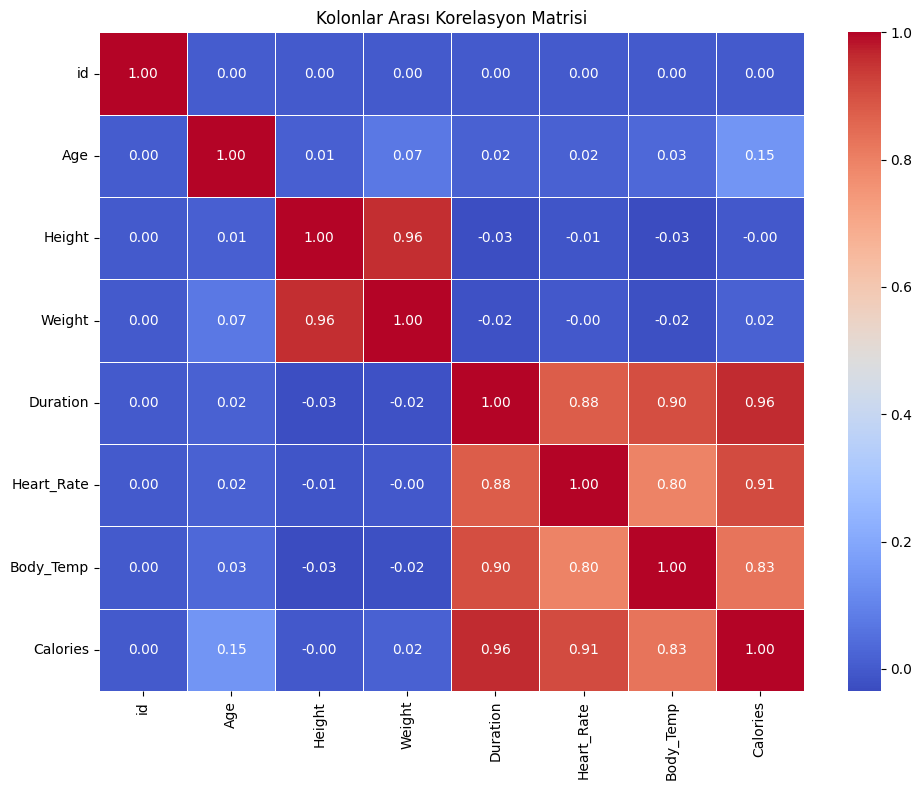

In [5]:
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kolonlar Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

In [6]:
def feature_engineering(df):
    # 1. BMI (Vücut Kitle İndeksi)
    df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)

    # 2. Egzersiz Yoğunluğu (Intensity)
    df["Intensity"] = (df["Heart_Rate"] * df["Duration"]) / df["Age"]

    # 3. Cinsiyet Kodlama (Sex: male -> 1, female -> 0)
    df["Sex_encoded"] = df["Sex"].map({"male": 1, "female": 0})

    # 4. Yaş Başına Süre
    df["Duration_per_Age"] = df["Duration"] / df["Age"]

    # 5. Kalp Atış Hızı Başına BMI
    df["HeartRate_per_BMI"] = df["Heart_Rate"] / df["BMI"]




    df["Max_HR"] = 220 - df["Age"]
    

    df["Intensity_Percent"] = (df["Heart_Rate"] / df["Max_HR"]) * 100

    df = df.drop(columns=["Height", "Weight", "BMI", "Sex_encoded", "Max_HR", "Sex"])
    
    return df


In [7]:
df = feature_engineering(df)

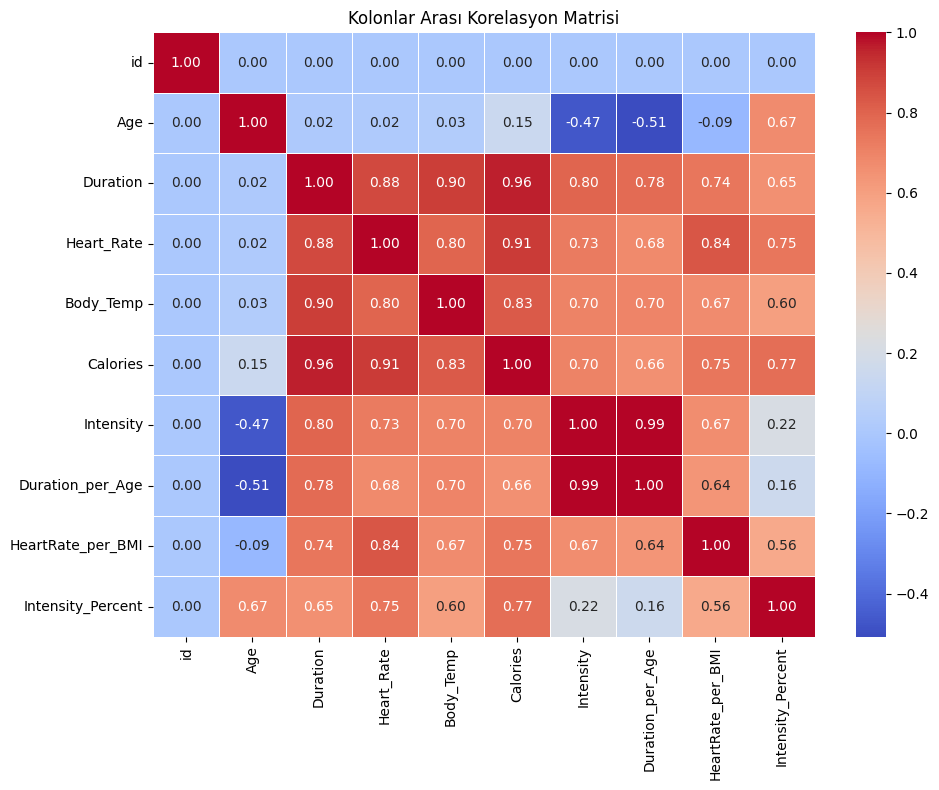

In [8]:
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kolonlar Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
# df.to_csv('processed_train_data.csv', index=False)
# test = feature_engineering(test)
# test.to_csv('processed_test_data.csv', index=False)

KeyError: "['BMI', 'Sex_encoded', 'Max_HR'] not found in axis"

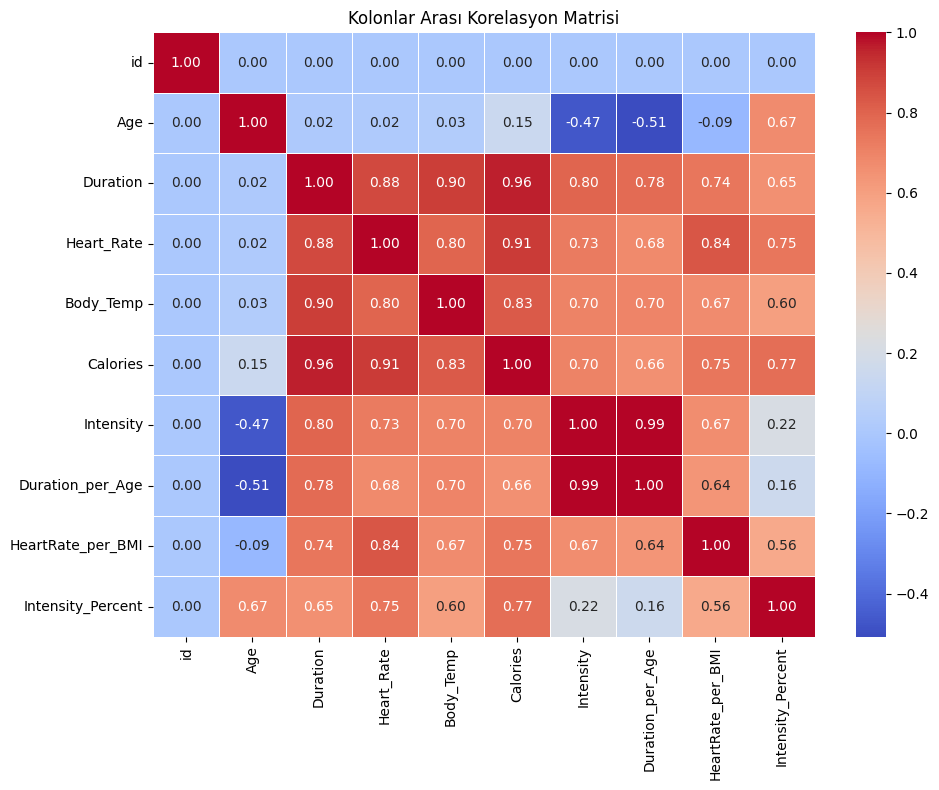

In [25]:
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kolonlar Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

In [33]:
# Define features (X) and target (y)
X = df.drop(['Calories', 'id', 'Sex'], axis=1)
y = df['Calories']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (600000, 8)
X_test shape: (150000, 8)
y_train shape: (600000,)
y_test shape: (150000,)


In [34]:
X_train.head()

,Age,Duration,Heart_Rate,Body_Temp,Intensity,Duration_per_Age,HeartRate_per_BMI,Intensity_Percent
453635,43,6.0,87.0,39.1,12.139535,0.139535,3.528876,49.152542
11651,48,12.0,97.0,40.2,24.250000,0.250000,4.315602,56.395349
431999,51,15.0,96.0,40.5,28.235294,0.294118,3.648939,56.804734
529211,45,2.0,83.0,38.3,3.688889,0.044444,3.124195,47.428571
110925,22,25.0,98.0,40.7,111.363636,1.136364,4.039184,49.494949


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

En iyi parametreler: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
En iyi RMSE: 6.891560400839824

Test seti sonuçları:
Random Forest RMSE: 6.89
Random Forest MAE: 4.39
Random Forest R2 Score: 0.9877


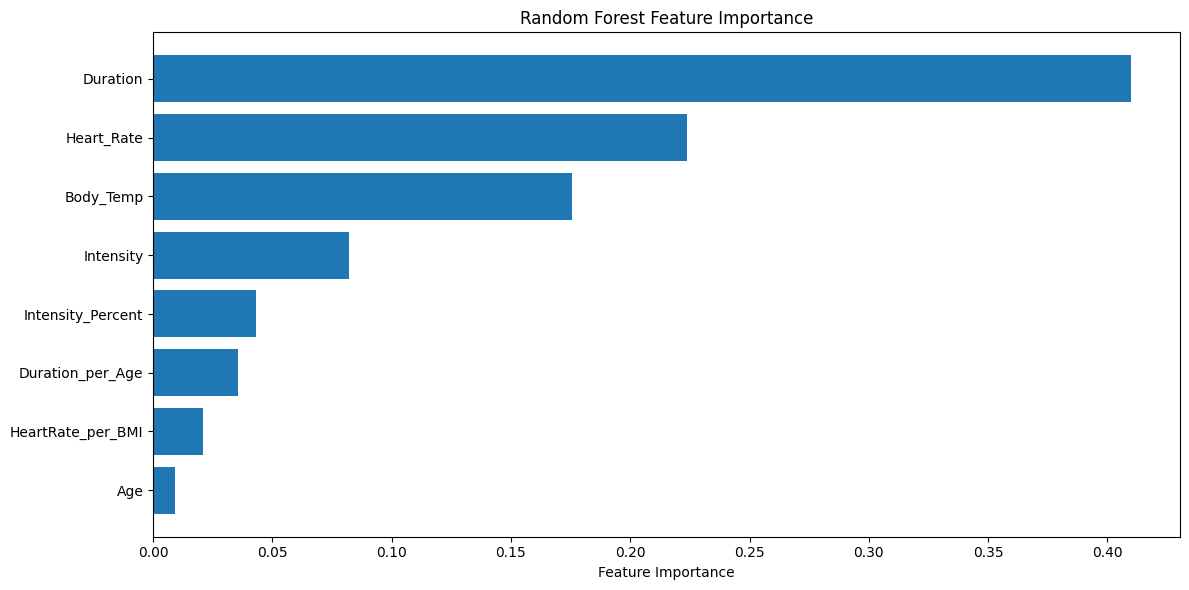

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Random Forest için parametre grid'i tanımla
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# Base Random Forest modelini oluştur
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV nesnesini oluştur
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_params,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    verbose=2
)

# Grid search'ü gerçekleştir
rf_grid.fit(X_train[:2000], y_train[:2000])

# En iyi parametreleri ve skoru yazdır
print("\nEn iyi parametreler:", rf_grid.best_params_)
print("En iyi RMSE:", (-rf_grid.best_score_))

# En iyi model ile tahmin yap
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)

# Performans metriklerini hesapla
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\nTest seti sonuçları:")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")

# Özellik önemlerini görselleştir
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [36]:
rf_model = RandomForestRegressor(
    n_estimators=200,          # GridSearch'ten gelen en iyi değerler
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42,
    n_jobs=-1                  # Tüm CPU çekirdeklerini kullan
)


rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features='log2', min_samples_split=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [37]:
# Test seti üzerinde tahmin yap
rf_predictions = rf_model.predict(X_test)

# Model performansını değerlendir
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model Performansı:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R2 Score: {rf_r2:.4f}")

Random Forest Model Performansı:
RMSE: 5.49
MAE: 3.44
R2 Score: 0.9922
